In [51]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from scipy.stats import t
df = pd.read_csv('MME_outcomes_vulnerable_populations.csv')

In [52]:
m = sm.OLS(df['all_OUD'], sm.add_constant(np.arange(5)))
r = m.fit()

In [61]:
m1 = sm.OLS(df['depression_OUD'], sm.add_constant(np.arange(5)))
r1 = m1.fit()
t1 = (r1.params['x1'] - r.params['x1'])/np.sqrt(r1.bse['x1']**2 + 0.5*r.bse['x1']**2)

m2 = sm.OLS(df['diabetes_OUD'], sm.add_constant(np.arange(5)))
r2 = m2.fit()
t2 = (r2.params['x1'] - r.params['x1'])/np.sqrt(r2.bse['x1']**2 + r.bse['x1']**2)

m3 = sm.OLS(df['obesity_OUD'], sm.add_constant(np.arange(5)))
r3 = m3.fit()
t3 = (r3.params['x1'] - r.params['x1'])/np.sqrt(r3.bse['x1']**2 + r.bse['x1']**2)

In [63]:
t.sf(abs(t1), 6) ## Depression

0.01174984215745275

In [64]:
t.sf(abs(t2), 6) ## Diabetes

0.009511910560272603

In [65]:
t.sf(abs(t3), 6) ## Obesity

0.08575471930628996

## Annual change

In [72]:
import matplotlib.pyplot as plt

(0.0, 20.0)

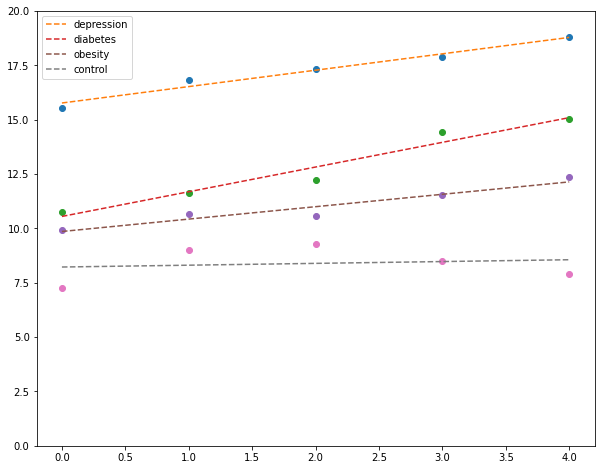

In [97]:
plt.figure(figsize = (10,8))

plt.plot(df['depression_OUD'], marker = 'o', linestyle = '')
plt.plot(r1.params['const'] + r1.params['x1']*np.arange(5), linestyle = '--', label = 'depression')


plt.plot(df['diabetes_OUD'], marker = 'o', linestyle = '')
plt.plot(r2.params['const'] + r2.params['x1']*np.arange(5), linestyle = '--', label = 'diabetes')

plt.plot(df['obesity_OUD'], marker = 'o', linestyle = '')
plt.plot(r3.params['const'] + r3.params['x1']*np.arange(5), linestyle = '--', label = 'obesity')


plt.plot(df['all_OUD'], marker = 'o', linestyle = '')
plt.plot(r.params['const'] + r.params['x1']*np.arange(5), linestyle = '--', label = 'control')


plt.legend(loc = 'best')
plt.ylim(0,20)

In [101]:
r1.pvalues['x1'], r2.pvalues['x1'], r3.pvalues['x1'], r.pvalues['x1']

(0.001850797265719887,
 0.004317656634327945,
 0.010359875270468917,
 0.7964876516625423)

In [103]:
r1.params['x1'], r2.params['x1'], r3.params['x1'], r.params['x1']

(0.7538423502572633,
 1.1359682068713022,
 0.5700934055762581,
 0.08373616890904256)